In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Model Building

In [7]:
df = pd.read_pickle("/content/drive/My Drive/Loyalist_college/Term3/DSPM/merged_all_table.csv.pkl", compression='bz2')

In [8]:
df.shape

(25979, 115)

In [16]:
df.isna().sum()

season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_Y6       1832
home_player_Y7       1832
home_player_Y8       1832
home_player_Y9       1832
home_player_Y10      1832
home_player_

## preprocessing

In [58]:
match_df = df.copy()

In [59]:
#droping some columns
cols_to_drop =['match_api_id' ,'home_team_api_id' ,'away_team_api_id','PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA','home_player_X1' ,'home_player_X2' ,'home_player_X3' ,'home_player_X4' ,'home_player_X5' ,'home_player_X6' ,
               'home_player_X7' ,'home_player_X8' ,'home_player_X9' ,'home_player_X10' ,'home_player_X11' ,'away_player_X1' ,'away_player_X2' ,
               'away_player_X3' ,'away_player_X4' ,'away_player_X5' ,'away_player_X6' ,'away_player_X7' ,'away_player_X8' ,'away_player_X9' ,
               'away_player_X10' ,'away_player_X11' ,'home_player_Y1' ,'home_player_Y2' ,'home_player_Y3' ,'home_player_Y4' ,'home_player_Y5' ,
               'home_player_Y6' ,'home_player_Y7' ,'home_player_Y8' ,'home_player_Y9' ,'home_player_Y10' ,'home_player_Y11' ,'away_player_Y1' ,
               'away_player_Y2' ,'away_player_Y3' ,'away_player_Y4' ,'away_player_Y5' ,'away_player_Y6' ,'away_player_Y7' ,'away_player_Y8' ,
               'away_player_Y9' ,'away_player_Y10' ,'away_player_Y11' ,'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' ,
               'possession','season', 'stage', 'date','country_name', 'league_name']
match_df.drop(columns=cols_to_drop, inplace = True)

In [60]:
match_df.shape

(25979, 46)

In [62]:
X = match_df.drop(columns=['target'])
y= match_df[['target']]

In [63]:
X.shape

(25979, 45)

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Perform missing value imputation using 'mean' strategy for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X = numeric_imputer.fit_transform(X)
sc = StandardScaler()
X_preprocess = sc.fit_transform(X)
le = LabelEncoder()
y_le_encoded = le.fit_transform(y)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    LGBMClassifier()
]
# Loop through each classifier and compute the accuracy
for classifier in classifiers:
    scores = cross_val_score(classifier,X_preprocess, y_le_encoded, cv=5)
    avg_accuracy = scores.mean()
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {avg_accuracy}\n")

Classifier: LogisticRegression
Accuracy: 0.5305051935263745

Classifier: DecisionTreeClassifier
Accuracy: 0.4055971166092819

Classifier: GaussianNB
Accuracy: 0.41013859776640205



KeyboardInterrupt: ignored

In [ ]:
# only bets features
# Classifier: LogisticRegression
# Accuracy: 0.5200735666215441

# added 'country_id' ,'league_id' ,'season' ,'stage' with bets
# Classifier: LogisticRegression
# Accuracy: 0.4584877313636536

Checking LGBM

In [40]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocess,y_le_encoded, stratify=y_le_encoded, test_size=0.3, random_state=42)

In [41]:
lgbm_classifier = LGBMClassifier()

In [42]:
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [43]:
y_pred = lgbm_classifier.predict(X_test)

In [46]:
lgbm_classifier.score(X_test,y_test)

0.5220682576340775

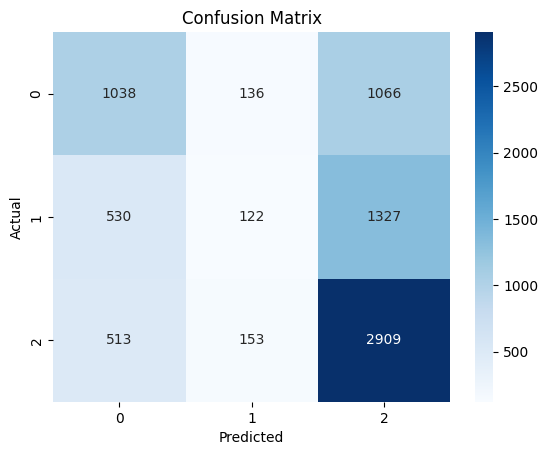

In [44]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.46462614976026523
Precision: 0.47038902116505715
Recall: 0.5220682576340775


In [54]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

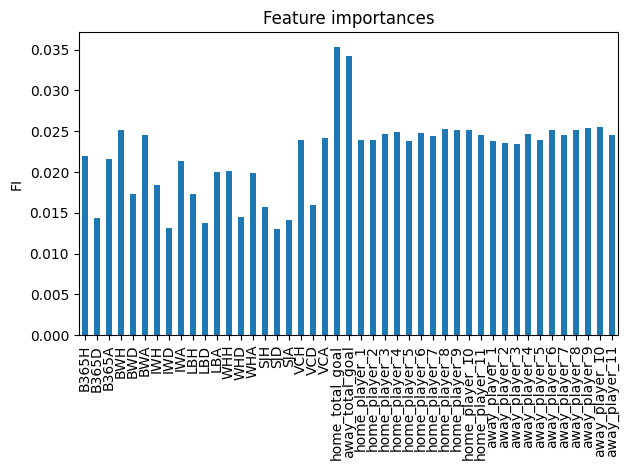

In [56]:
importances= rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(forest_importances)
ax.set_title("Feature importances")
ax.set_ylabel("FI")
fig.tight_layout()

#### Trials

In [ ]:
# cols_to_drop = ['id','match_api_id',
#                 'home_team_goal','away_team_goal',# removing it because we dont have this data for future matches
#                 'home_player_X1','home_player_X2','home_player_X3','home_player_X4','home_player_X5','home_player_X6','home_player_X7','home_player_X8','home_player_X9','home_player_X10','home_player_X11',
#                 'away_player_X1','away_player_X2','away_player_X3','away_player_X4','away_player_X5','away_player_X6','away_player_X7','away_player_X8','away_player_X9','away_player_X10','away_player_X11',
#                 'home_player_Y1','home_player_Y2','home_player_Y3','home_player_Y4','home_player_Y5','home_player_Y6','home_player_Y7','home_player_Y8','home_player_Y9','home_player_Y10','home_player_Y11',
#                 'away_player_Y1','away_player_Y2','away_player_Y3','away_player_Y4','away_player_Y5','away_player_Y6','away_player_Y7','away_player_Y8','away_player_Y9','away_player_Y10','away_player_Y11',
#                 'home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11',
#                 'away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11',
#                 'goal','shoton','shotoff','foulcommit','card','cross','corner','possession']
# # dropping columns
# df.drop(cols_to_drop, axis=1, inplace=True)

# dropping rows some irrelevant columns
# cols_to_drop = ['id','match_api_id','home_team_goal','away_team_goal','date','goal','shoton','shotoff','foulcommit','card','cross','corner','possession']
# df.drop(cols_to_drop, axis=1, inplace=True)

# # dropping rows with given percentage of null values
# threshold_percentage = 0.3
# def drop_rows(dfl, percentage):
#     k = ((dfl.isna().sum()/dfl.isna().count())<percentage)
#     k = k[k==True]
#     print("selected columns: \n", k.index)
#     return dfl[k.index]

# df = drop_rows(df, threshold_percentage)
# print(df.shape)

# checking distrimution of betting values
# df['B365A'].plot(kind='hist', bins=50, figsize=(10,5), title='B365A')

# trying to impute missing bet odd values with both of the same teams pervious matches values
# df['matchpair'] = df['home_team_api_id'].astype(str) + df['away_team_api_id'].astype(str)
# df[(df.isna()['B365D'] == False)&(df['matchpair']== '84269800')]
## not working

# # trying to impute missing bet odd values with mean of the corresponing teams pervious matches values
# home_team_cols = ['B365H','BWH','IWH','LBH','WHH','SJH','VCH','GBH','BSH']
# away_team_cols = ['B365A','BWA','IWA','LBA','WHA','SJA','VCA','GBA','BSA']
# draw_cols = ['B365D','BWD','IWD','LBD','WHD','SJD','VCD','GBD','BSD']
# df.groupby('home_team_api_id').mean()
# # [column_name][htapiid]